# Kanishk Bisen

## Data Science and Business Analytics Intern at The Sparks Foundation

# Prediction using Supervised Machine Learning

## Question : Need to find out the score of a student based on the study hours

In [66]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [67]:
# Reading data from remote link
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
print("Data imported successfully")

Data imported successfully


In [68]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no null values.

In [70]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Using scatter plot, we can easily find out the relation between score and no. of hours studied.

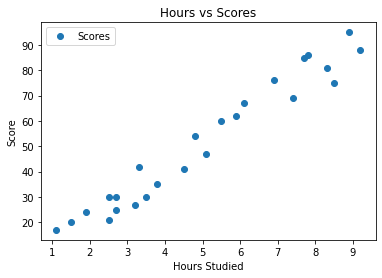

In [71]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and score.**

## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
Here, we'll use 'iloc' function to slice the data into inputs and outputs in order to use the data into train and test datasets.

In [72]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in **train_test_split()** method:

In [73]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [74]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


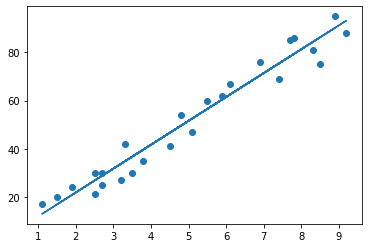

In [75]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [76]:
print(X_test) # Testing data - In Hours
Y_prediction = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [77]:
# Comparing Actual vs Predicted
predicted_data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_prediction})  
predicted_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<AxesSubplot:>

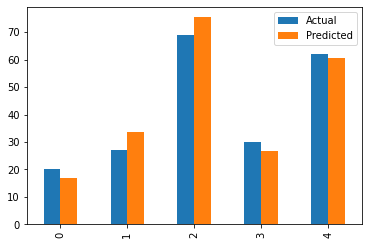

In [78]:
df = predicted_data.head()
df.plot(kind = 'bar')

## Task question: What will be predicted score if a student studies for 9.25 hrs/day?

In [79]:
# You can also test with your own data
hours = [[9.25]]
own_prediction = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [80]:
print(f'The Train score: {regressor.score(X_train, Y_train)}')
print(f'The Test score: {regressor.score(X_test, Y_test)}')

from sklearn import metrics
#from sklearn import mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediction))

The Train score: 0.9515510725211552
The Test score: 0.9454906892105355
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
